# Chi-Square Test


### (stats.chi2_contingency)


##### from scipy.stats import chi2

##### chi_square = sum([(o-e)**2./e for o,e in zip(observed_value, expected_value)])

##### chi_square_stats = chi_square[0] + chi_square[1]

<br><br>
<br><br>

The test is applied when you have 2 categorical variables from a single population. It is used to determine wheather there is a significant association between 2 variables.

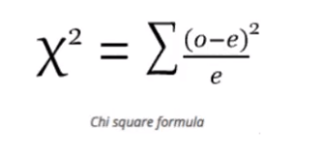

## Step1:

In [1]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [2]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Select features to compare

df_table = pd.crosstab(df['sex'], df['smoker'])
print(df_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


**Trying to find co-relation between `sex` and `smoker`**

## Step2:

In [8]:
# Observed Value

observed_value = df_table.values

print(f"observed_value:\n {observed_value}")

observed_value:
 [[60 97]
 [33 54]]


In [9]:
val = stats.chi2_contingency(df_table)
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [10]:
# Expected Value

expected_value = val[3]
expected_value

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [26]:
num_of_rows = len(df_table.iloc[0:2,0])
num_of_cols = len(df_table.iloc[0,0:2])

print(num_of_rows)
print(num_of_cols)

2
2


In [16]:
degree_of_freedom = (num_of_rows-1)*(num_of_cols-1)    # (2-1)*(2-1) = 1

print(f"Degree of freedom: {degree_of_freedom}")
alpha = 0.05

Degree of freedom: 1


In [27]:
1-0.05

0.95

## Step3:

In [14]:
from scipy.stats import chi2

chi_square = sum([(o-e)**2./e for o,e in zip(observed_value, expected_value)])
chi_square_stats = chi_square[0] + chi_square[1]

print(chi_square)
print("chi_square_stats:",chi_square_stats)

[0.00119737 0.00073745]
chi_square_stats: 0.001934818536627623


In [22]:
# Percent point function i.e inverse of CDF

critical_value = chi2.ppf(q=1-alpha, df=degree_of_freedom) 

print("critical_value:",critical_value)

critical_value: 3.841458820694124


In [23]:
if chi_square_stats >= critical_value:
    print("Reject H0, there is a relationship between 2 categorical variables")
else:
    print("Reject H1, there is no relationship between 2 categorical variables")

Reject H1, there is no relationship between 2 categorical variables


**OR**

In [24]:
pvalue = 1-chi2.cdf(x=chi_square_stats, df=degree_of_freedom)

print(f"Level Of Significance: {alpha}")
print(f"Degree Of Freedom: {degree_of_freedom}")
print(f"P-value: {pvalue}")

Level Of Significance: 0.05
Degree Of Freedom: 1
P-value: 0.964915107315732


In [25]:
if pvalue <= alpha:
    print("Reject H0, there is a relationship between 2 categorical variables")
else:
    print("Reject H1, there is no relationship between 2 categorical variables")

Reject H1, there is no relationship between 2 categorical variables
